# 1. Feature Selection
## a. Filter Methods
        - 1. Variance Threshold
        - 2. Pearson Correlation Method
        - 3. Mutual Information Method
        - 4. Chi-square Method

### 1. Variance Threshold

In [1]:
import pandas as pd

In [2]:
# Make DataFrame of the given data 
data = pd.DataFrame({"A":[1,2,4,1,2,4], 
                    "B":[4,5,6,7,8,9], 
                    "C":[0,0,0,0,0,0],
                    "D":[1,1,1,1,1,1]}) 

data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1


In [3]:
data['E'] = 2
data.loc[2, 'E']=1.6
data

,A,B,C,D,E
0,1,4,0,1,2.0
1,2,5,0,1,2.0
2,4,6,0,1,1.6
3,1,7,0,1,2.0
4,2,8,0,1,2.0
5,4,9,0,1,2.0


In [5]:
data.var()

A    1.866667
B    3.500000
C    0.000000
D    0.000000
E    0.026667
dtype: float64

In [6]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.01)
vt.fit(data)
print(vt.get_support())

[ True  True False False  True]


In [7]:
data[list(data.columns[vt.get_support()])]

,A,B,E
0,1,4,2.0
1,2,5,2.0
2,4,6,1.6
3,1,7,2.0
4,2,8,2.0
5,4,9,2.0


#### Using Santander dataset
- Using https://www.kaggle.com/competitions/santander-customer-satisfaction/data?select=train.csv

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df = pd.read_parquet('santander.parquet')
df = df[0:10000]
print(df.shape)
df.head()

(10000, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [8]:
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']
print(X.shape)
print(y.shape)

(10000, 370)
(10000,)


In [14]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,  random_state=0)

print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(7000, 370) (3000, 370)
(7000,) (3000,)


In [18]:
from sklearn.feature_selection import VarianceThreshold
vars_thresh = VarianceThreshold(threshold=0.2)
vars_thresh.fit(X_train)
len(X_train.columns[vars_thresh.get_support()])

177

In [19]:
X_train.columns[vars_thresh.get_support()]

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=177)

In [21]:
print(X_train.shape)
print(X_test.shape)

# getting only the columns with better variance
X_train = X_train[list(X_train.columns[vars_thresh.get_support()])]
X_test = X_test[list(X_test.columns[vars_thresh.get_support()])]

print(X_train.shape)
print(X_test.shape)

(7000, 370)
(3000, 370)
(7000, 177)
(3000, 177)


### 2. Pearson Correlation Method

In [26]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [27]:
X = df.drop(labels=['target'], axis=1)
y = df['target']
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((309, 10), (133, 10))

In [29]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.153557,0.188303,0.368620,0.297202,0.244288,-0.093426,0.237258,0.307782,0.336885
sex,0.153557,1.000000,0.091397,0.244072,0.044777,0.144798,-0.357750,0.316989,0.137324,0.244203
bmi,0.188303,0.091397,1.000000,0.440047,0.294804,0.296430,-0.370819,0.421839,0.468186,0.408797
bp,0.368620,0.244072,0.440047,1.000000,0.281195,0.208237,-0.221548,0.304717,0.452203,0.437637
s1,0.297202,0.044777,0.294804,0.281195,1.000000,0.890232,0.006409,0.552291,0.541937,0.360728
s2,0.244288,0.144798,0.296430,0.208237,0.890232,1.000000,-0.242837,0.664564,0.328660,0.312509
s3,-0.093426,-0.357750,-0.370819,-0.221548,0.006409,-0.242837,1.000000,-0.759045,-0.394563,-0.302167
s4,0.237258,0.316989,0.421839,0.304717,0.552291,0.664564,-0.759045,1.000000,0.613152,0.454160
s5,0.307782,0.137324,0.468186,0.452203,0.541937,0.328660,-0.394563,0.613152,1.000000,0.503512
s6,0.336885,0.244203,0.408797,0.437637,0.360728,0.312509,-0.302167,0.454160,0.503512,1.000000


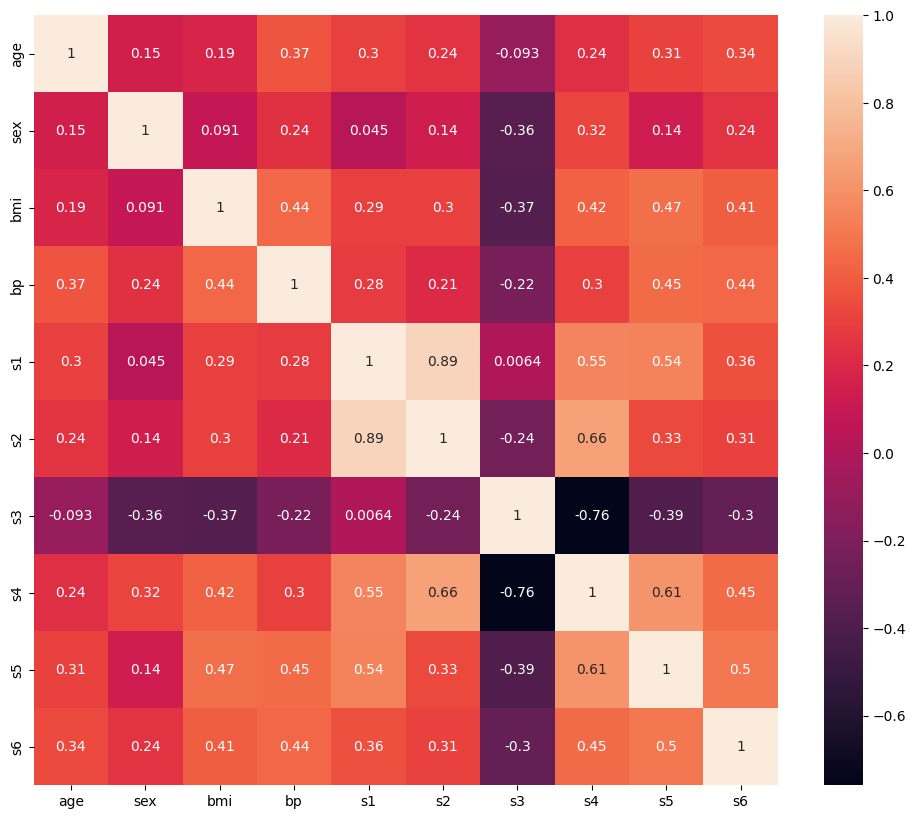

In [31]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)
plt.show()